In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import neighbors
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

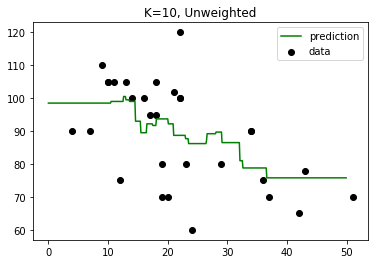

In [16]:
# Build model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = np.array(music.loudness).reshape(-1, 1)
Y = music.bpm
knn.fit(X, Y)

# Prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

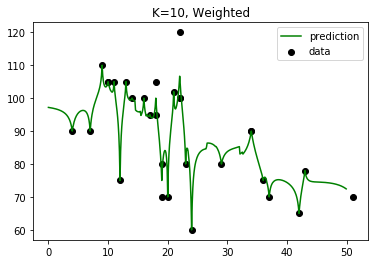

In [19]:
# Now with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
Tw = np.arange(0, 50, 0.1).reshape(-1,1)

Y_w = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(Tw, Y_w, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [20]:
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() ** 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() ** 2))

Unweighted Accuracy: -0.18 (+/- 0.11)
Weighted Accuracy: 0.11 (+/- 0.22)


In [128]:
def unweighted(x, y, t, k=10, cv=5):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    Y_ = knn.predict(t)

    for col in x.columns:
        plt.scatter(x[col], y, c='k', label= str(col) + ' data')
    plt.plot(t, Y_, c='g', label='prediction')
    plt.legend()
    plt.title('K= '+str(k)+', Unweighted')
    plt.show()
    score = cross_val_score(knn, x, y, cv=cv)
    print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() ** 2))
    
def weighted(x, y, t, k=10, cv=5):
    knnw = neighbors.KNeighborsRegressor(n_neighbors=k, weights='distance')
    knnw.fit(x, y)

    Y_ = knnw.predict(t)
    
    for col in x.columns:
        plt.scatter(x[col], y, c='k', label= str(col) + ' data')
    plt.plot(t, Y_, c='g')
    plt.legend()
    plt.title('K= '+str(k)+', Weighted')
    plt.show()
    score_w = cross_val_score(knnw, x, y, cv=cv)
    print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() ** 2))

## Add other features back in and re-run model

(2000, 2)


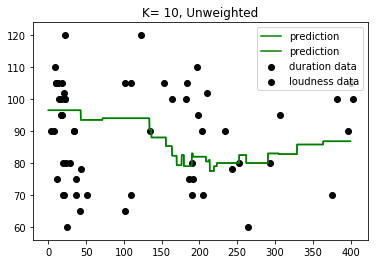

Unweighted Accuracy: -0.42 (+/- 0.15)


In [127]:
newx = music.drop('bpm', axis=1)
newy = music.bpm
newt = np.arange(0, 400, 0.1).reshape(-1,2)
print(newt.shape)

unweighted(newx, newy, newt)

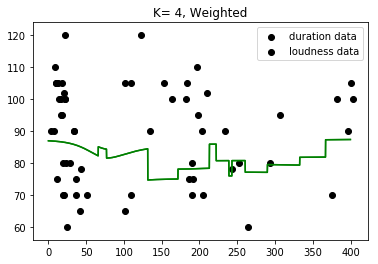

Weighted Accuracy: -0.63 (+/- 0.67)


In [129]:
weighted(newx, newy, newt, 4)

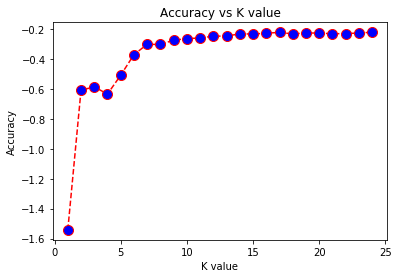

In [120]:
accuracy = []
for i in range(1, 25):
    knnw = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance')
    knnw.fit(newx, newy)
    Y_ = knnw.predict(newt)
    score_w = cross_val_score(knnw, newx, newy, cv=5)
    accuracy.append(np.mean(score_w))
    
plt.plot(range(1,25), accuracy, color='r', ls='dashed', marker='o', mfc='b', ms=10)
plt.title('Accuracy vs K value')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

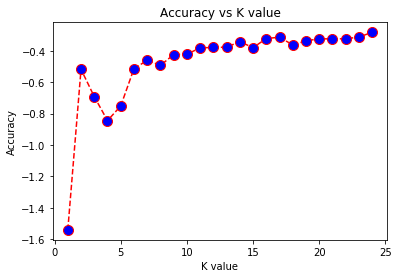

In [121]:
accuracy = []
for i in range(1, 25):
    knnw = neighbors.KNeighborsRegressor(n_neighbors=i)
    knnw.fit(newx, newy)
    Y_ = knnw.predict(newt)
    score_w = cross_val_score(knnw, newx, newy, cv=5)
    accuracy.append(np.mean(score_w))
    
plt.plot(range(1,25), accuracy, color='r', ls='dashed', marker='o', mfc='b', ms=10)
plt.title('Accuracy vs K value')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()